#DRUG CLASSIFICATION MODEL
We have the data of a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y.

Our goal is to build a model to find out which drug might be appropriate for a future patient with the same illness.

**Download the data:**

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-07-16 09:14:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-07-16 09:14:15 (985 MB/s) - ‘drug200.csv’ saved [6027/6027]



**Insights from the dataset:**

The features or input variables of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients

The target variable or output variable is the drug that each patient responded to.

Our aim is to build different classification models from historical data of patients and their responses to different medications, then to predict the class of an unknown patient or to find a proper drug for a new patient.

Before loading the dataset, we need to import all the relevant libraries.

In [2]:

#importing basic libraries
import numpy as np     #A core Python library for scientific computing using high-performance arrays.
import pandas as pd    #A fast and powerful data analysis and manipulation tool.
import matplotlib.pyplot as plt    # A comprehensive library for creating visualizations in Python.
import seaborn as sns   # Another data visualization library built on top of Matplotlib.

Now let's load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe

In [3]:
#Reading the Data
drug_data=pd.read_csv("drug200.csv")


**Exploratory Data Analysis (EDA)**

Analysing the basic information from the dataset :

In [4]:

print(drug_data.shape) # gives the number of rows and columns in the dataset.

(200, 6)


Now let's preview the first 10 rows.

In [5]:

drug_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [6]:
#The last 10 rows are
drug_data.tail(10)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,drugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [7]:
#The columns in our dataset are :

drug_data.columns # To get the list of all columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
#Now let's check the datatype of each column.

drug_data.dtypes


Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
#Using the info() method, we can glean more information on the dataset including the names of the different columns and their corresponding data types as well as the number of non-null values.

print(drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Here, we can see that Age, Sex, BP,Cholestrol,Na to K value are the feature variables/Input-variables/Independent-variables.

'Drug' is our Target-variable/Dependent-variable/out-variable

In [11]:
#We use the describe() function to get the statistical parameters of the dataset.

# Describing the data
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
#Now we need to check for any missing values in our dataset. Ensuring the quality of data is paramount. The missing values need to be replaced accordingly.

drug_data[drug_data.isnull().any(axis=1)]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug


It shows there are no null values in our dataset.

If there were any, we need to either omit the rows with null values or replace them with any statistical parameters or categorical value.

Then we check for any duplicate values.

In [13]:

drug_data.duplicated().sum()

0

So we have don't have any duplicate column as well.

In [15]:

categorical = [var for var in drug_data.columns if drug_data[var].dtype=='O']
numerical = [var for var in drug_data.columns if drug_data[var].dtype!='O']

In [16]:

print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 4 categorical variables : 
 ['Sex', 'BP', 'Cholesterol', 'Drug']


In [17]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(drug_data[var].unique()), ' labels')

Sex  contains  2  labels
BP  contains  3  labels
Cholesterol  contains  2  labels
Drug  contains  5  labels


In [18]:
# view summary statistics in numerical variables to check for outliers
print(round(drug_data[numerical].describe()),2)


         Age  Na_to_K
count  200.0    200.0
mean    44.0     16.0
std     17.0      7.0
min     15.0      6.0
25%     31.0     10.0
50%     45.0     14.0
75%     58.0     19.0
max     74.0     38.0 2


In [19]:
drug_data.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [21]:
drug_data.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [22]:
drug_data.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [23]:
drug_data['Drug'].value_counts()


Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

The people who are treated with drugY is much greater than the number of people treated with other drugs. The least number of people are treated with drugB and drugC.

# Insights from the dataset:

There are 6 variables in this data set:

4 categorical variables and 2 continuous variables.

The feature sets are:

* Age -> Age of the patient (continuous variable)

* Sex -> Gender of the patient (male or female)

* BP -> Blood Pressure Levels of the patient (high, normal, or low)

* Cholesterol -> Cholesterol Levels of patient (high or normal)

* Na_to_K -> Sodium to potassium ratio in blood of patient (continuous variable)
-------------------------------------------------------------------------------
The output variable is:

Drug -> Type of drug (A,B,C,X and Y)

# Data Visualizations

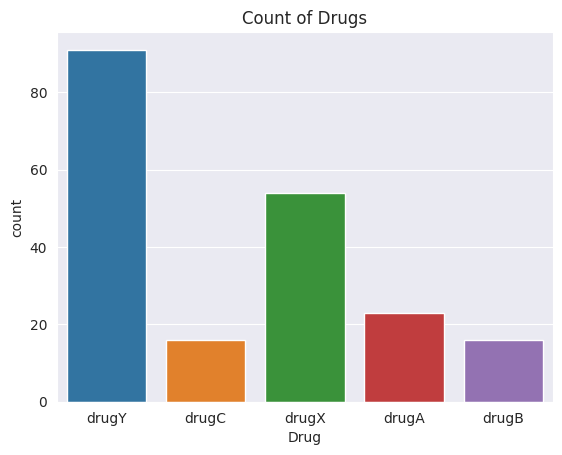

In [24]:

sns.set_style("darkgrid")
sns.countplot(x=drug_data['Drug'],hue=drug_data['Drug'])
plt.title('Count of Drugs');


The usage of drugY is much more than other drugs while drugB and drugC are used least.

So the dataset is imbalanced dataset. Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations,
 i.e one class label has a very high number of observations and the other has a very low number of observations.

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. Sometimes even if the model fails to identify the minority class, the accuracy score of the model can be much greater as it predicts the majority class very well.

In cases like fraud detection or disease prediction, it is vital to identify the minority classes correctly. So model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too.

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset.This technique is used to upsample or downsample the minority or majority class. There are broadly two types of methods for this

* Undersampling
* Oversampling.

When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

Text(0.5, 1.0, 'The distribution of Age')

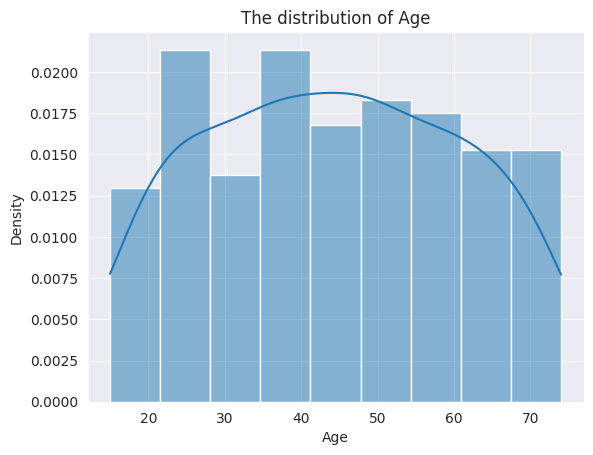

In [25]:
sns.set_style("darkgrid")
sns.histplot(drug_data['Age'],kde=True, stat="density")
plt.title("The distribution of Age")  #This is same as distplot()

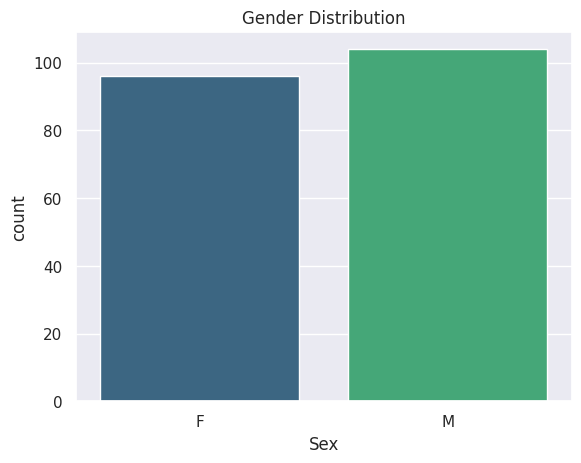

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=drug_data, hue='Sex', palette="viridis")
plt.title('Gender Distribution')
plt.show()


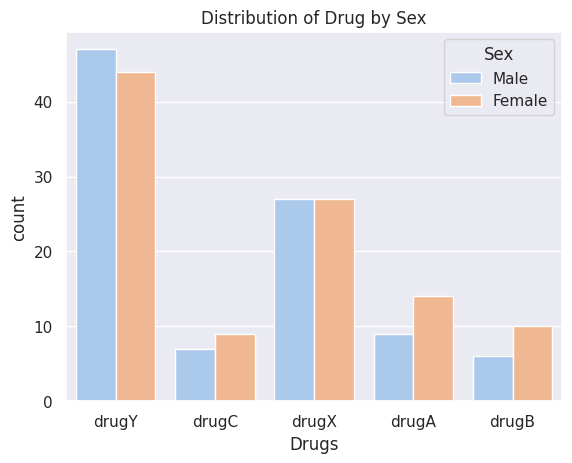

In [27]:
sns.set_style("darkgrid")
sns.countplot(data =drug_data,x = "Drug", hue="Sex",palette="pastel")
plt.title("Distribution of Drug by Sex")
plt.xlabel("Drugs")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

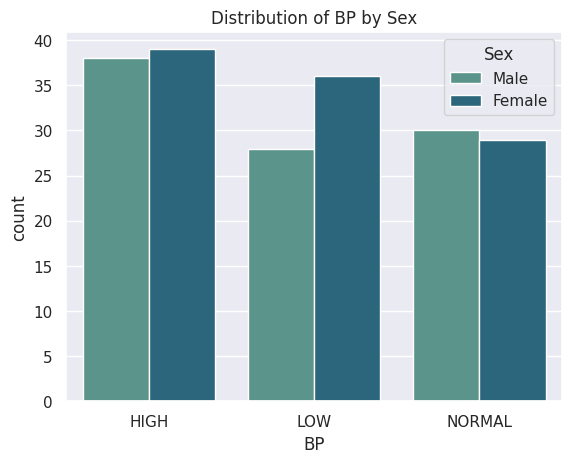

In [28]:
sns.set_style("darkgrid")
sns.countplot(data=drug_data, x="BP", hue="Sex", palette="crest")
plt.title("Distribution of BP by Sex")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()


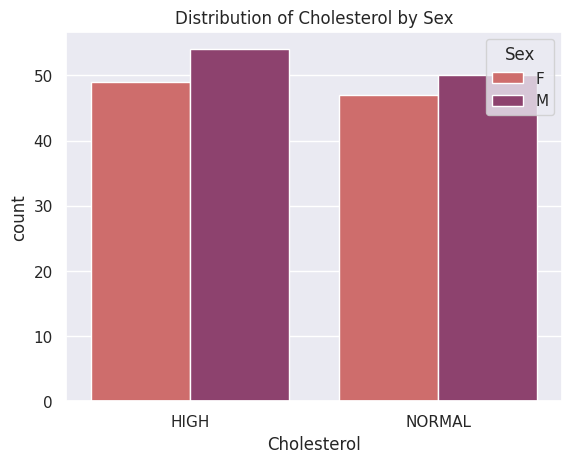

In [29]:
sns.set_style("darkgrid")
sns.countplot(data =drug_data,x = "Cholesterol", hue="Sex",palette="flare")
plt.title("Distribution of Cholesterol by Sex")
plt.legend(title="Sex", loc="upper right")
plt.show()

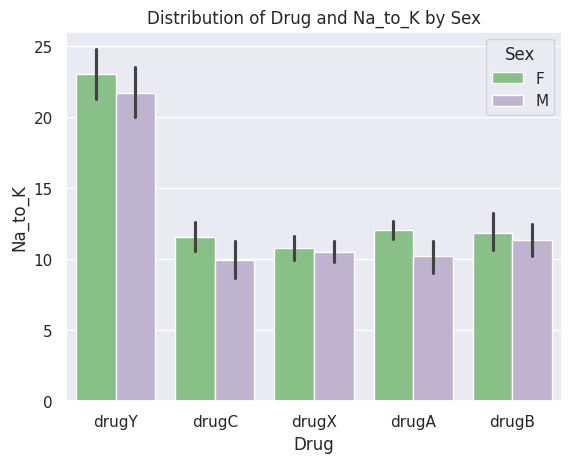

In [30]:
sns.set_style("darkgrid")
sns.barplot(data=drug_data,x="Drug",y="Na_to_K",hue="Sex",palette="Accent")
plt.title("Distribution of Drug and Na_to_K by Sex")
plt.xlabel("Drug")
plt.ylabel("Na_to_K")
plt.legend(title="Sex", loc="upper right")
plt.show()


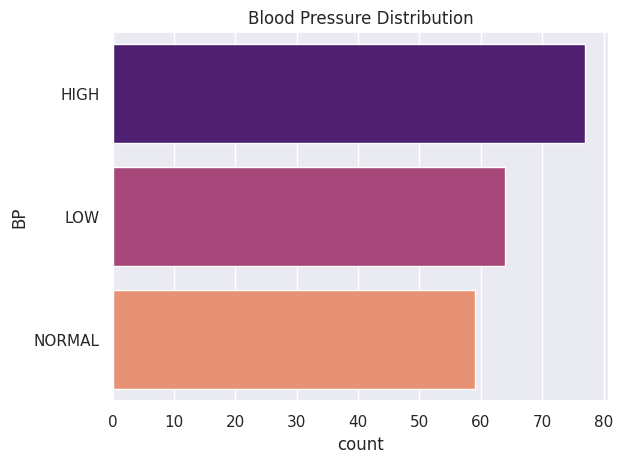

In [31]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=drug_data,hue='BP', palette="magma")
plt.title('Blood Pressure Distribution')
plt.show()


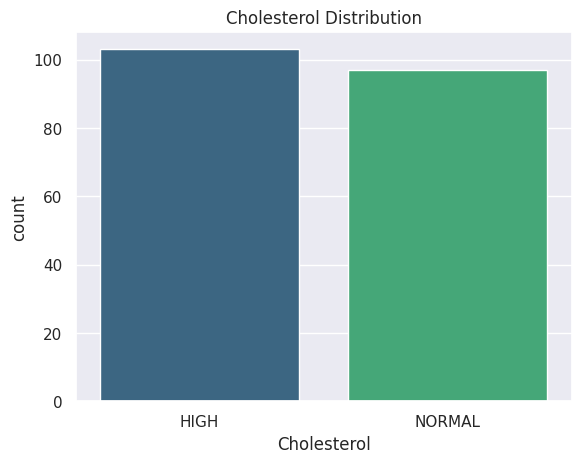

In [32]:

sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=drug_data,hue="Cholesterol",palette="viridis")
plt.title('Cholesterol Distribution')
plt.show()

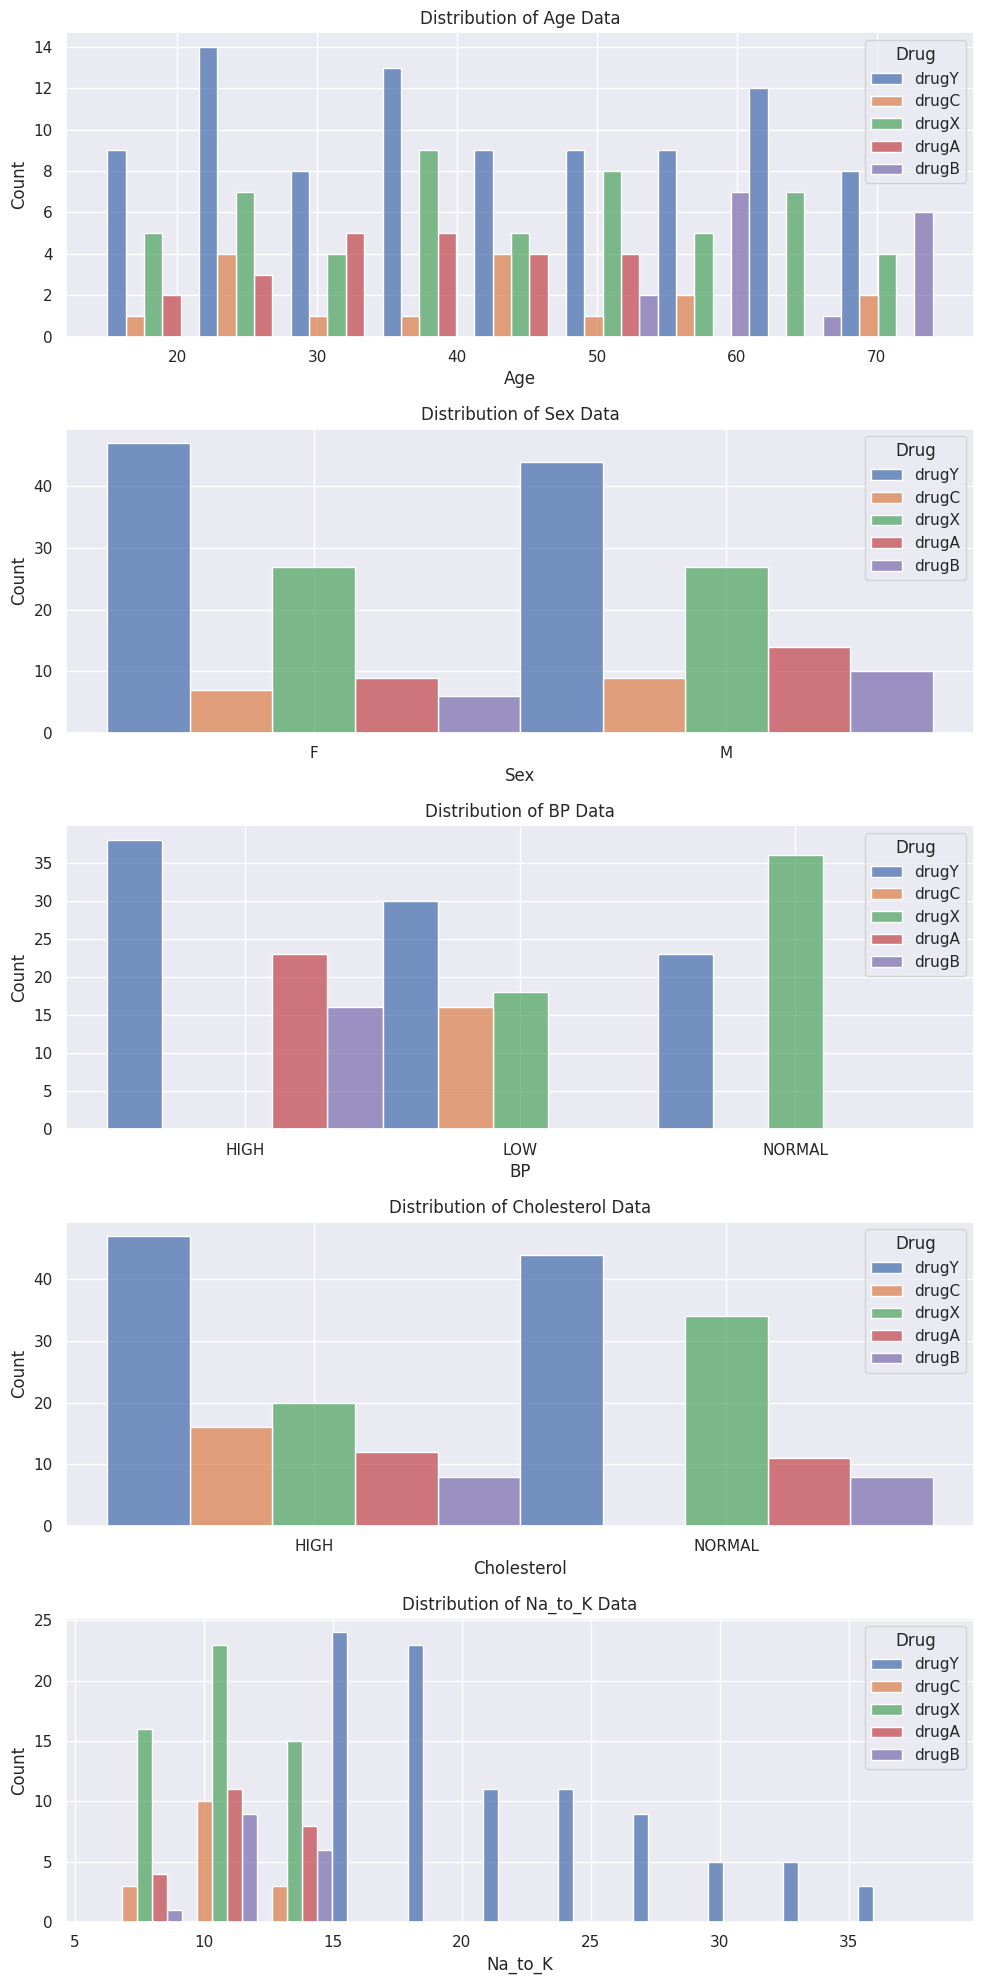

In [33]:

cols = drug_data.columns[:-1].tolist()
plt.figure(figsize = (10, 20))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 1, i)
    sns.histplot(x = drug_data[col], hue = drug_data["Drug"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()


**Na_to_K Distribution:**

In [34]:

print("Maximum value of Na_to_K:",drug_data.Na_to_K.max())
print("Minimum value of Na_to_K:", drug_data.Na_to_K.min())

Maximum value of Na_to_K: 38.247
Minimum value of Na_to_K: 6.269


Na_to_K range is between 6.269 and 38.247.

[Text(0.5, 1.0, 'Distribution of Na_to_K')]

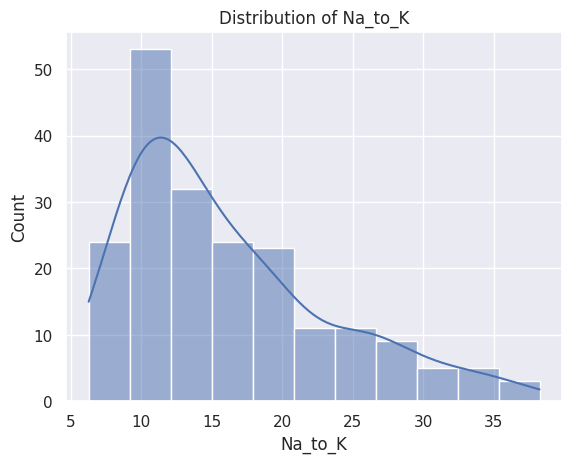

In [35]:

sns.histplot(data=drug_data, x="Na_to_K", kde=True).set(title='Distribution of Na_to_K')

It is skewed distribution.

**Relation of Na_to_K and Age, by Gender (numerical variables):**

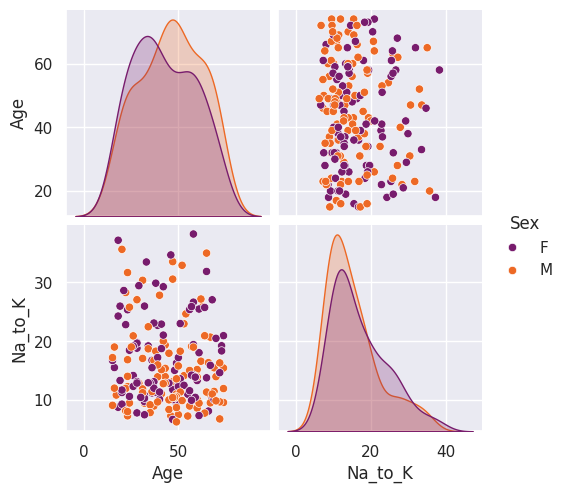

In [36]:

sns.pairplot(drug_data,hue='Sex',palette='inferno')

# Data Preprocessing

In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

#Transforming all categorical variables to numerical labels
drug_data['Sex']= LabelEncoder().fit_transform(drug_data['Sex'])
drug_data['BP']= LabelEncoder().fit_transform(drug_data['BP'])
drug_data['Cholesterol']= LabelEncoder().fit_transform(drug_data['Cholesterol'])
drug_data['Drug']= LabelEncoder().fit_transform(drug_data['Drug'])

#Checking the label encoded data
drug_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
5,22,0,2,0,8.607,3
6,49,0,2,0,16.275,4
7,41,1,1,0,11.037,2
8,60,1,2,0,15.171,4
9,43,1,1,1,19.368,4


<Axes: >

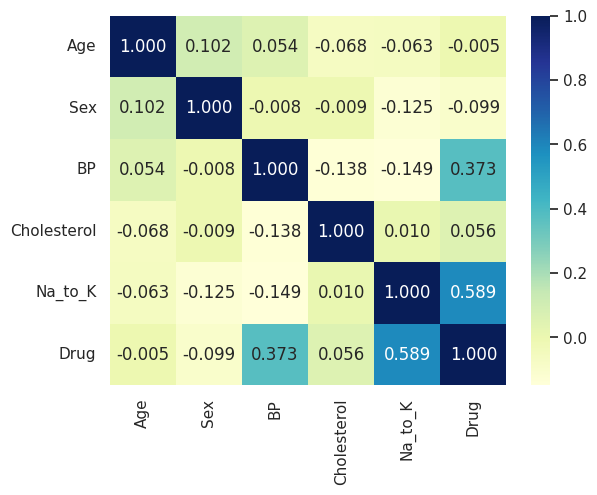

In [38]:

sns.heatmap(drug_data.corr(), annot = True, fmt = ".3f", cmap = 'YlGnBu')

Age and Sex are negatively correlated to Drug.

# Selecting the features

In [39]:
#Splitting the dataset into input and output variables.
y=drug_data['Drug'] #Target variable
X=drug_data.drop(['Drug'],axis=1)  #Features


In [40]:

X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [41]:

y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int64

# Splitting the dataset into training and test set
After splitting to test and train set, we need to oversample the train set to make the training data balanced. If we upsample before train and test split, the new synthetically created observations from the minority class in the training dataset might end up in the testing dataset. This is in a way allows the algorithm to cheat since it learned from something similar and now is testing on almost very similar data points.

It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state = 0)
# func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training


We are using SMOTE for upsampling.

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter #To get the Counter
counter=Counter(y_train)
print('Before',counter)

#oversampling the train dataset using SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

counter=Counter(y_train)
print('After',counter)

Before Counter({4: 64, 3: 38, 0: 16, 1: 11, 2: 11})
After Counter({3: 64, 4: 64, 0: 64, 1: 64, 2: 64})


Now we can see the drug data in the training sample is equal in size. Thus, the dataset is perfectly balanced.

To visualise the upsampled dataset:

<Axes: xlabel='count', ylabel='Drug'>

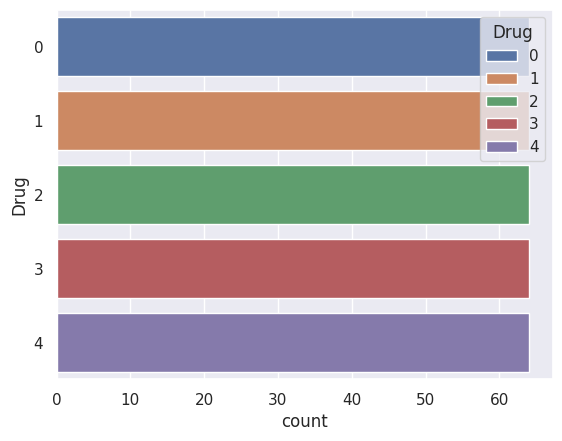

In [44]:

sns.countplot(y=y_train,data=drug_data,hue=y_train,palette='deep')

# Logistic Regression

In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=10,max_iter=10000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [46]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[ 6,  1,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  2, 14,  0],
       [ 0,  0,  0,  2, 25]])

Text(0.5, 427.9555555555555, 'Predicted label')

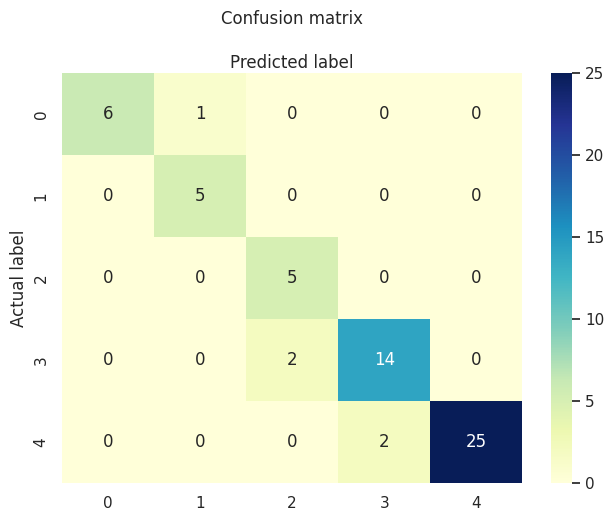

In [47]:
#Visualisation of confusion matrix
class_names=['Drug A','Drug B','Drug C','Drug X','Drug Y'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:

from sklearn.metrics import classification_report
target_names = ['Drug A','Drug B','Drug C','Drug X','Drug Y']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      Drug A       1.00      0.86      0.92         7
      Drug B       0.83      1.00      0.91         5
      Drug C       0.71      1.00      0.83         5
      Drug X       0.88      0.88      0.88        16
      Drug Y       1.00      0.93      0.96        27

    accuracy                           0.92        60
   macro avg       0.88      0.93      0.90        60
weighted avg       0.93      0.92      0.92        60



Accuracy of Logistic Regression is 95%

# Decision Tree Classification

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred= dtclassifier.predict(X_test)

In [51]:

from sklearn.metrics import accuracy_score

In [52]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  2  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]


In [53]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      0.60      0.75         5
           3       0.89      1.00      0.94        16
           4       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.98      0.92      0.94        60
weighted avg       0.97      0.97      0.96        60



In [54]:
accuracy_score(y_test,y_pred)

0.9666666666666667

Decision Tree Model gives 98.3% accuracy.

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state=0) # only 10 trees will b ok as dataset is only 400+ records. Default is 100.
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred = rfclassifier.predict(X_test)

In [57]:

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]


In [58]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [59]:

accuracy_score(y_test,y_pred)

1.0

Accuracy of Random Forest Classifier is 100%

**Standardisation of Data:**

Logistic regressions and tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models.

For distance-based models, standardization is performed to prevent features with wider ranges from dominating the distance metric.

K-nearest neighbors is a distance-based classifier that classifies new observations based on similar measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables contribute equally to the similarity measures.

Support vector machine tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate over other features when calculating the distance. Standardization gives all features the same influence on the distance metric.

In [60]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) # apply on whole x data
X_test=scaler.transform(X_test)

# K Nearest Neighbors

In [61]:

from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') # by default n_neighbors = 5
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [62]:

y_pred = knnclassifier.predict(X_test)


In [63]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      1.00      1.00         5
           2       0.71      1.00      0.83         5
           3       0.67      1.00      0.80        16
           4       1.00      0.56      0.71        27

    accuracy                           0.80        60
   macro avg       0.83      0.91      0.84        60
weighted avg       0.86      0.80      0.79        60



In [64]:

accuracy_score(y_test,y_pred)

0.8

KNN Model has an accuracy of 80%

# SVM Classifier

In [65]:

from sklearn.svm import SVC
svr_lin = SVC(kernel='linear', C=100, gamma='auto')
svr_lin.fit(X_train,y_train)
y_pred= svr_lin.predict(X_test)

In [66]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


[[ 5  2  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  1 26]]


In [67]:

cr = classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       0.94      1.00      0.97        16
           4       1.00      0.96      0.98        27

    accuracy                           0.95        60
   macro avg       0.93      0.94      0.92        60
weighted avg       0.96      0.95      0.95        60



In [68]:

accuracy_score(y_test,y_pred)

0.95

SVM classifier has 97% accuracy

# Naive Bayes Model:

In [69]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = nbclassifier.predict(X_test)

In [71]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)


[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 3  0  3  3 18]]


In [72]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.84      1.00      0.91        16
           4       1.00      0.67      0.80        27

    accuracy                           0.85        60
   macro avg       0.83      0.93      0.86        60
weighted avg       0.89      0.85      0.85        60



In [73]:
accuracy_score(y_test,y_pred)


0.85

The accuracy of Naive Bayes (Gaussian) is 83%

# **# Conclusion:**

# **Accuracy of Different Models:**

Logistic Regression --- 95%

Decision Tree Classifier --- 98%

Random Forest Classifier --- 100%

KNN Classifier --- 80%

SVM Classifier --- 97%

Naive Bayes Classifier --- 83%

Random Forest Classifier gives 100% accuracy. Decision Tree, SVM Classifier and Loistic Regression have accuracies above 95%.

Random Forest Classification is recommended for Drug Classification.